## Statistical Learning Final Project

### Niv Alex 
### Yuval Geyari

Step 1: Import key libraries: pandas, numpy, scipy, matplotlib, and seaborn.

In [2]:
# ===================================
# Final Project: Plastic Waste vs Income Level
# ===================================

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import kruskal, shapiro
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load the CSV files 

In [3]:
income_df = pd.read_csv("world-bank-income-groups.csv")
plastic_df = pd.read_csv("mismanaged-plastic-waste-per-capita.csv")

In [4]:
income_df

,Entity,Code,Year,World Bank's income classification,time
0,Afghanistan,AFG,2023,Low-income countries,2023
1,Albania,ALB,2023,Upper-middle-income countries,2023
2,Algeria,DZA,2023,Upper-middle-income countries,2023
3,Andorra,AND,2023,High-income countries,2023
4,Angola,AGO,2023,Lower-middle-income countries,2023
...,...,...,...,...,...
195,Vanuatu,VUT,2023,Lower-middle-income countries,2023
196,Vietnam,VNM,2023,Lower-middle-income countries,2023
197,Yemen,YEM,2023,Low-income countries,2023
198,Zambia,ZMB,2023,Lower-middle-income countries,2023


Checking for null values

In [5]:
null_count = income_df["World Bank's income classification"].isna().sum()
print(f"Number of null values in 'World Bank's income classification': {null_count}")

Number of null values in 'World Bank's income classification': 0


Drop the time column and rename the income classification column to something shorter

In [6]:
income_df.drop(columns=["time"], inplace=True)
income_df.rename(columns={"World Bank's income classification": "Income_Level"}, inplace=True)

To simplify the values in the Income_Level column, we map the long descriptions to shorter descriptions

In [7]:
# Map the long income levels to shorter values
income_df["Income_Level"] = income_df["Income_Level"].map({
    "Low-income countries": "Low",
    "Lower-middle-income countries": "Lower-middle",
    "Upper-middle-income countries": "Upper-middle",
    "High-income countries": "High"
})

In [8]:
income_df

,Entity,Code,Year,Income_Level
0,Afghanistan,AFG,2023,Low
1,Albania,ALB,2023,Upper-middle
2,Algeria,DZA,2023,Upper-middle
3,Andorra,AND,2023,High
4,Angola,AGO,2023,Lower-middle
...,...,...,...,...
195,Vanuatu,VUT,2023,Lower-middle
196,Vietnam,VNM,2023,Lower-middle
197,Yemen,YEM,2023,Low
198,Zambia,ZMB,2023,Lower-middle


###  Some graphs about the income data

Number of countries by income level 

C:\Users\user\AppData\Local\Temp\ipykernel_2592896\1579809081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


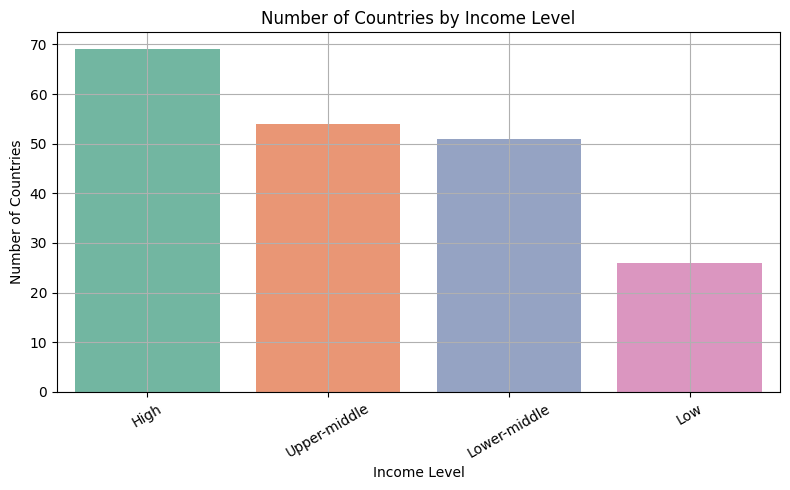

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=income_df,
    x="Income_Level",
    order=income_df["Income_Level"].value_counts().index,
    palette="Set2"
)
plt.title("Number of Countries by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Number of Countries")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(True)
plt.show()

Create and display an interactive choropleth map using Plotly Express that visualizes the World Bank Income Classification of countries.

In [10]:
import plotly.express as px

# Plot the choropleth map
fig = px.choropleth(
    income_df,
    locations="Code",                 
    color="Income_Level",            
    hover_name="Entity",             
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="World Bank Income Classification by Country",
    projection="natural earth"
)

# Show the map
fig.update_layout(legend_title_text='Income Level')
fig.show()

### Mismanaged plastic waste per capita Data

In [11]:
plastic_df

,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918
...,...,...,...,...
160,Vietnam,VNM,2019,11.536045
161,Western Sahara,ESH,2019,7.068729
162,World,OWID_WRL,2019,8.008551
163,Yemen,YEM,2019,10.004012


Remove rows where 'Code' is missing and where 'Entity' is 'World'

In [12]:
plastic_df = plastic_df[plastic_df['Code'].notna() & (plastic_df['Entity'] != 'World')]
plastic_df.reset_index(drop=True, inplace=True)

In [13]:
plastic_df

,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
0,Albania,ALB,2019,24.239153
1,Algeria,DZA,2019,17.758995
2,Angola,AGO,2019,7.445279
3,Antigua and Barbuda,ATG,2019,6.463918
4,Argentina,ARG,2019,10.401912
...,...,...,...,...
154,Venezuela,VEN,2019,23.545764
155,Vietnam,VNM,2019,11.536045
156,Western Sahara,ESH,2019,7.068729
157,Yemen,YEM,2019,10.004012


Merge the world-bank-income-groups data and mismanaged-plastic-waste-per-capita data

In [14]:
# Merge on the 'Code' column
merged_df = pd.merge(plastic_df, income_df, on='Code', how='inner')

# Optional: check shape and columns
print(f"Merged shape: {merged_df.shape}")
print(merged_df.columns)

Merged shape: (153, 7)
Index(['Entity_x', 'Code', 'Year_x',
       'Mismanaged plastic waste per capita (kg per year)', 'Entity_y',
       'Year_y', 'Income_Level'],
      dtype='object')


In [15]:
merged_df

,Entity_x,Code,Year_x,Mismanaged plastic waste per capita (kg per year),Entity_y,Year_y,Income_Level
0,Albania,ALB,2019,24.239153,Albania,2023,Upper-middle
1,Algeria,DZA,2019,17.758995,Algeria,2023,Upper-middle
2,Angola,AGO,2019,7.445279,Angola,2023,Lower-middle
3,Antigua and Barbuda,ATG,2019,6.463918,Antigua and Barbuda,2023,High
4,Argentina,ARG,2019,10.401912,Argentina,2023,Upper-middle
...,...,...,...,...,...,...,...
148,United States,USA,2019,0.812815,United States,2023,High
149,Uruguay,URY,2019,26.753322,Uruguay,2023,High
150,Vietnam,VNM,2019,11.536045,Vietnam,2023,Lower-middle
151,Yemen,YEM,2019,10.004012,Yemen,2023,Low


Final_df will contain only 3 columns : Country, Plastic_kg_per_capita_year, Income_Level

In [16]:
final_df = merged_df[['Entity_x', 'Mismanaged plastic waste per capita (kg per year)', 'Income_Level']]
final_df.rename(columns={'Entity_x': 'Country',
    'Mismanaged plastic waste per capita (kg per year)': 'Plastic_kg_per_capita_year'
}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2592896\3161909953.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
final_df

,Country,Plastic_kg_per_capita_year,Income_Level
0,Albania,24.239153,Upper-middle
1,Algeria,17.758995,Upper-middle
2,Angola,7.445279,Lower-middle
3,Antigua and Barbuda,6.463918,High
4,Argentina,10.401912,Upper-middle
...,...,...,...
148,United States,0.812815,High
149,Uruguay,26.753322,High
150,Vietnam,11.536045,Lower-middle
151,Yemen,10.004012,Low


###  Some graphs about the final data

Bar plot of plastic waste per capita, top 20 countries

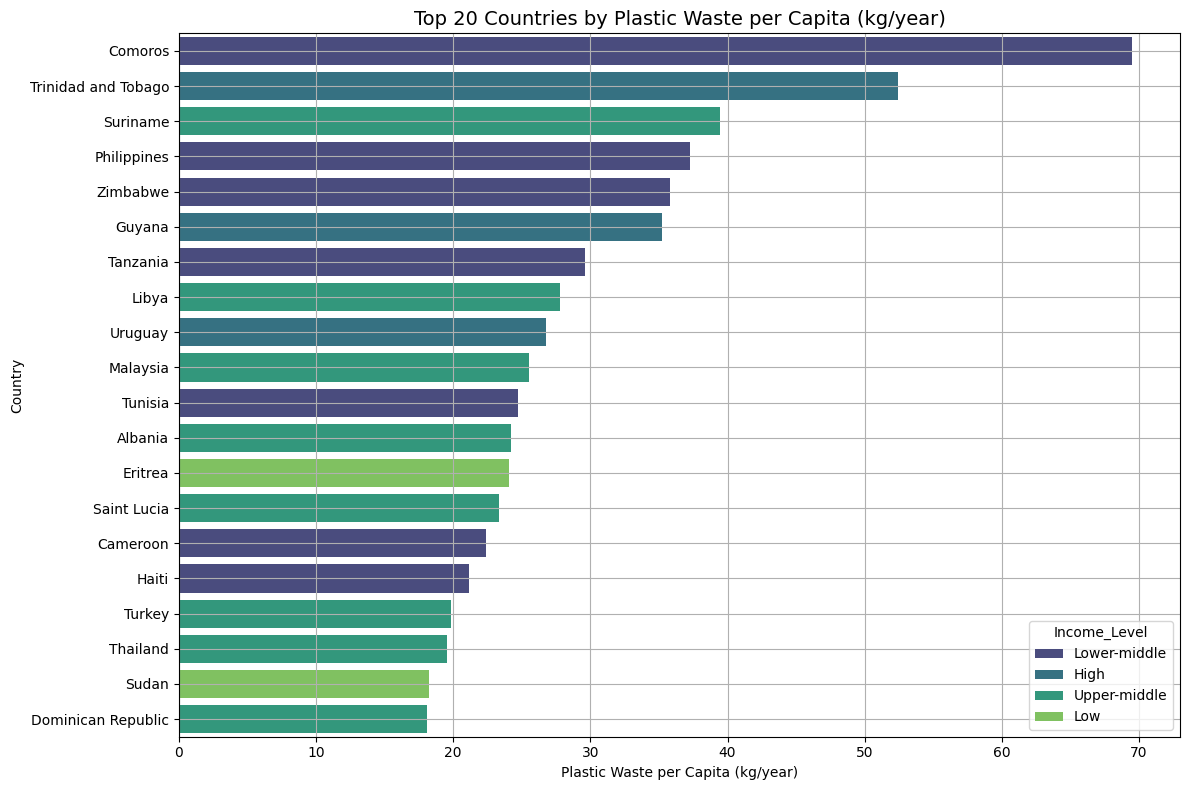

In [18]:
top_countries = final_df.sort_values("Plastic_kg_per_capita_year", ascending=False).head(20)
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_countries,
    x="Plastic_kg_per_capita_year",
    y="Country",
    hue="Income_Level",
    palette="viridis",
)

plt.title("Top 20 Countries by Plastic Waste per Capita (kg/year)", fontsize=14)
plt.xlabel("Plastic Waste per Capita (kg/year)")
plt.ylabel("Country")
plt.grid(True)
plt.tight_layout()
plt.show()

### Key Insights

* Comoros leads the list with the highest plastic waste per capita, exceeding 70 kg/year — despite being a lower-middle-income country.

* Most countries in this list are not high-income — many are lower-middle or upper-middle income, with a few low-income countries present (like Eritrea and Sudan).

* High-income countries are rare on this Top-20 list, indicating that higher income does not necessarily equate to higher per capita plastic waste — possibly due to better waste management and recycling systems.

* This implies that mismanagement, lack of recycling infrastructure, or imported plastic waste may be major drivers for high waste per capita in non-high-income nations.

We also examined why Comoros ranks so high in terms of plastic waste per capita and explored the common characteristics of countries with similarly high levels. 

Our analysis suggests that such countries often share features such as small population sizes, limited waste management infrastructure, high reliance on imported goods, and in some cases, a significant tourism sector. 

These factors may inflate per capita figures despite relatively modest total waste generation.

## Statistics part

### Checking for Normality

Step 1: Shapiro-Wilk Test

The Shapiro-Wilk test is a statistical test that checks whether your data is normally distributed.

H₀ (Null Hypothesis): The data is normally distributed.

H₁ (Alternative Hypothesis): The data is not normally distributed.

In [19]:
stat, p_value = stats.shapiro(final_df["Plastic_kg_per_capita_year"])
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Conclusion: Data is NOT normally distributed (reject H0).")
else:
    print("Conclusion: Data is normally distributed (fail to reject H0).")


Shapiro-Wilk Test Statistic: 0.7699
P-value: 3.2171e-14
Conclusion: Data is NOT normally distributed (reject H0).


Step 2: QQ Plot

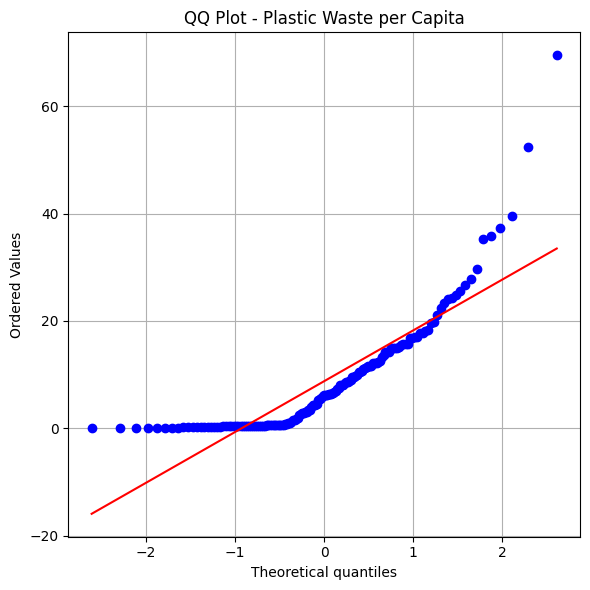

In [20]:
plt.figure(figsize=(6, 6))
stats.probplot(final_df["Plastic_kg_per_capita_year"], dist="norm", plot=plt)
plt.title("QQ Plot - Plastic Waste per Capita")
plt.grid(True)
plt.tight_layout()
plt.show()

A QQ plot compares your data’s distribution to a perfect normal distribution (the red line).

As we can see the left tail (lower values) bends below the line and the right tail (higher values) rises sharply above the line.

So our data is not normally distributed.

Step 3: print histogram

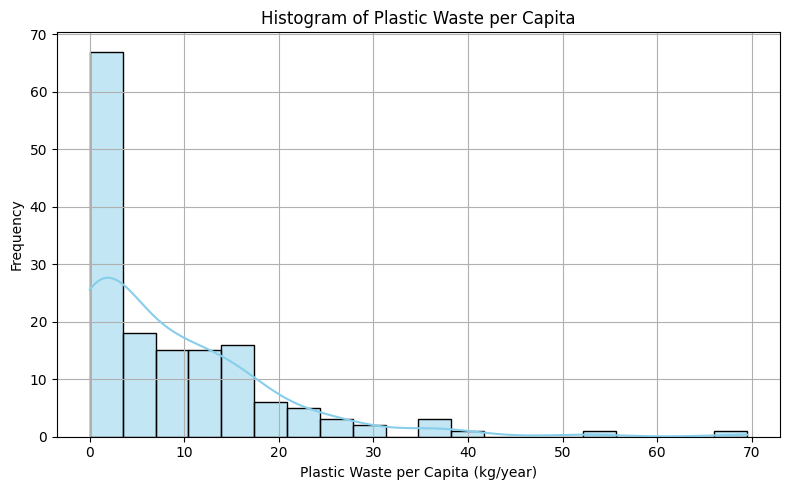

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df["Plastic_kg_per_capita_year"], kde=True, bins=20, color='skyblue')

plt.title("Histogram of Plastic Waste per Capita")
plt.xlabel("Plastic Waste per Capita (kg/year)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()

plt.show()

The histogram is right-skewed (long tail on the right).
A normal distribution would look bell shape and symmetric. 

### Kruskal-Wallis test

The Kruskal-Wallis test is a non-parametric statistical test used to compare more than two groups.

Our question: "Is the amount of mismanaged plastic waste per capita significantly different across countries with different income levels?"

notice: 
We have 4 groups of income (Low, Lower-middle, Upper-middle, High) and our data is not normal so we can use Kruskal-Wallis test

H₀ : The distribution of plastic waste per capita is the same across all income levels (no difference between the groups).

H₁ : At least one income level group differs significantly in its distribution of plastic waste per capita.

In [22]:
# split the data by income level
groups = final_df.groupby("Income_Level")["Plastic_kg_per_capita_year"]

# extract the data per group
low = groups.get_group("Low")
lower_middle = groups.get_group("Lower-middle")
upper_middle = groups.get_group("Upper-middle")
high = groups.get_group("High")

for level in final_df["Income_Level"].unique():
    countries = final_df[final_df["Income_Level"] == level]["Country"].tolist()
    print(f"\nCountries in {level} income group ({len(countries)} total):")
    print(", ".join(countries))


stat, p_value = kruskal(low, lower_middle, upper_middle, high)

print("\nKruskal-Wallis Test")
print(f"Statistic(Q): {stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Conclusion
if p_value < 0.05:
    print("Conclusion: Reject H0 — At least one group differs significantly.")
else:
    print("Conclusion: Fail to reject H0 — No significant difference among groups.")


Countries in Upper-middle income group (41 total):
Albania, Algeria, Argentina, Belize, Bosnia and Herzegovina, Brazil, China, Colombia, Costa Rica, Dominica, Dominican Republic, Ecuador, El Salvador, Equatorial Guinea, Fiji, Gabon, Georgia, Grenada, Guatemala, Indonesia, Iran, Iraq, Jamaica, Kazakhstan, Libya, Malaysia, Maldives, Marshall Islands, Mauritius, Mexico, Montenegro, Namibia, Peru, Saint Lucia, Saint Vincent and the Grenadines, South Africa, Suriname, Thailand, Tonga, Turkey, Ukraine

Countries in Lower-middle income group (40 total):
Angola, Bangladesh, Benin, Cambodia, Cameroon, Cape Verde, Comoros, Congo, Cote d'Ivoire, Djibouti, East Timor, Egypt, Ghana, Guinea, Haiti, Honduras, India, Jordan, Kenya, Kiribati, Lebanon, Lesotho, Mauritania, Morocco, Myanmar, Nicaragua, Nigeria, Pakistan, Palestine, Papua New Guinea, Philippines, Samoa, Sao Tome and Principe, Senegal, Solomon Islands, Sri Lanka, Tanzania, Tunisia, Vietnam, Zimbabwe

Countries in High income group (57 tot

#### Conclusion: we reject H0 so at least one group differs significantly.

### Post hoc Test

The Mann-Whitney U test is a non-parametric test used to compare whether two independent groups differ significantly in their distributions.

It's the non-parametric alternative to the independent two-sample t-test.

H₀: The two groups have the same distribution (no difference).

H₁ : The distributions of the two groups are different (one tends to have higher/lower values).

In [23]:
from itertools import combinations
from scipy.stats import mannwhitneyu
import pandas as pd

income_levels = final_df["Income_Level"].unique()
results = []

for group1, group2 in combinations(income_levels, 2):
    data1 = final_df[final_df["Income_Level"] == group1]["Plastic_kg_per_capita_year"]
    data2 = final_df[final_df["Income_Level"] == group2]["Plastic_kg_per_capita_year"]
    
    stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
    
    results.append({
        "Group 1": group1,
        "Group 2": group2,
        "U Statistic": stat,
        "Raw P-Value": p_value
    })

posthoc_df = pd.DataFrame(results)

k = len(posthoc_df)
posthoc_df["Bonferroni Corrected P"] = posthoc_df["Raw P-Value"] * k
posthoc_df["Bonferroni Corrected P"] = posthoc_df["Bonferroni Corrected P"].clip(upper=1.0)

posthoc_df["Significant (α=0.05)"] = posthoc_df["Bonferroni Corrected P"] < 0.05

print("\nMann–Whitney U Post-hoc Test Results (with Bonferroni correction):")
display(posthoc_df)


Mann–Whitney U Post-hoc Test Results (with Bonferroni correction):


,Group 1,Group 2,U Statistic,Raw P-Value,Bonferroni Corrected P,Significant (α=0.05)
0,Upper-middle,Lower-middle,703.0,2.711169e-01,1.000000e+00,False
1,Upper-middle,High,1895.0,1.708555e-07,1.025133e-06,True
2,Upper-middle,Low,318.0,8.532144e-01,1.000000e+00,False
3,Lower-middle,High,2086.0,4.237716e-12,2.542630e-11,True
4,Lower-middle,Low,306.0,9.172168e-01,1.000000e+00,False
5,High,Low,219.0,3.925411e-03,2.355246e-02,True


### Mann-Whitney U Tests (one sided)

High vs Upper-middle

H₀ : The distribution of plastic waste per capita in high-income countries is less than or equal to that in upper-middle-income countries.

H₁ : The distribution of plastic waste per capita in high-income countries is greater than that in upper-middle-income countries.

In [24]:
high = final_df[final_df["Income_Level"] == "High"]["Plastic_kg_per_capita_year"]
upper_middle = final_df[final_df["Income_Level"] == "Upper-middle"]["Plastic_kg_per_capita_year"]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(high, upper_middle, alternative='greater')
print(f"P-value: {p}")
if p < 0.05:
    print("Conclusion: Statistically significant. High-income countries produce more plastic waste per capita than Upper-middle-income countries.")
else:
    print("Conclusion: Not statistically significant. No evidence that High-income countries produce more plastic waste per capita than Upper-middle-income countries.")

P-value: 0.9999999178374752
Conclusion: Not statistically significant. No evidence that High-income countries produce more plastic waste per capita than Upper-middle-income countries.


High vs Lower-middle

H₀ : The distribution of plastic waste per capita in high-income countries is less than or equal to that in lower-middle-income countries.

H₁ : The distribution of plastic waste per capita in high-income countries is greater than that in lower-middle-income countries.

In [25]:
# High vs Lower-middle
high = final_df[final_df["Income_Level"] == "High"]["Plastic_kg_per_capita_year"]
lower_middle = final_df[final_df["Income_Level"] == "Lower-middle"]["Plastic_kg_per_capita_year"]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(high, lower_middle, alternative='greater')
print(f"P-value: {p}")
if p < 0.05:
    print("Conclusion: Statistically significant. High-income countries produce more plastic waste per capita than Lower-middle-income countries.")
else:
    print("Conclusion: Not statistically significant. No evidence that High-income countries produce more plastic waste per capita than Lower-middle-income countries.")

P-value: 0.9999999999979882
Conclusion: Not statistically significant. No evidence that High-income countries produce more plastic waste per capita than Lower-middle-income countries.


High vs Low


H₀ : The distribution of plastic waste per capita in high-income countries is less than or equal to that in low income countries.

H₁ : The distribution of plastic waste per capita in high-income countries is greater than that in low income countries.

In [26]:
# High vs Low
high = final_df[final_df["Income_Level"] == "High"]["Plastic_kg_per_capita_year"]
low = final_df[final_df["Income_Level"] == "Low"]["Plastic_kg_per_capita_year"]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(high, low, alternative='greater')
print(f"P-value: {p}")
if p < 0.05:
    print("Conclusion: Statistically significant. High-income countries produce more plastic waste per capita than Low-income countries.")
else:
    print("Conclusion: Not statistically significant. No evidence that High-income countries produce more plastic waste per capita than Low-income countries.")

P-value: 0.9981220089507447
Conclusion: Not statistically significant. No evidence that High-income countries produce more plastic waste per capita than Low-income countries.


### Results


High vs. Upper-middle: We failed to reject H₀ (p-value = 0.9999)

→ Conclusion: No evidence that High-income countries produce more than Upper-middle-income countries → the amounts are similar.

High vs. Lower-middle: We failed to reject H₀ (p-value = 0.9999)

→ Conclusion: No evidence that High-income countries produce more than Lower-middle-income countries → the amounts are similar.

High vs. Low: We failed to reject H₀ (p-value = 0.9981)

→ Conclusion: No evidence that High-income countries produce more than Low-income countries → the amounts are similar.

Because all these p-values are extremely high, it suggests that there is no statistical evidence that high-income countries produce more plastic waste per capita than others.

#### So we can try to reverse the hypotheses to test the opposite direction. 

## Reversed H₀ hypotheses

H₀: The plastic waste per capita in the comparison group (Upper-middle / Lower-middle / Low) is less than or equal to that of High-income countries.

H₁: The plastic waste per capita in the comparison group is greater than that of High-income countries (In other words, we're testing whether high-income countries produce less plastic waste per capita.)

In [27]:
high = final_df[final_df["Income_Level"] == "High"]["Plastic_kg_per_capita_year"]
upper_middle = final_df[final_df["Income_Level"] == "Upper-middle"]["Plastic_kg_per_capita_year"]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(upper_middle, high, alternative='greater')  # שינוי כאן בכיוון ההשוואה

print(f"P-value: {p:.6f}")

if p < 0.05:
    print("Conclusion: Statistically significant. Upper-middle-income countries produce more plastic waste per capita than High-income countries.")
else:
    print("Conclusion: Not statistically significant. No evidence that Upper-middle-income countries produce more plastic waste per capita than High-income countries.")

P-value: 0.000000
Conclusion: Statistically significant. Upper-middle-income countries produce more plastic waste per capita than High-income countries.


In [28]:
# Lower-middle vs High
high = final_df[final_df["Income_Level"] == "High"]["Plastic_kg_per_capita_year"]
lower_middle = final_df[final_df["Income_Level"] == "Lower-middle"]["Plastic_kg_per_capita_year"]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(lower_middle, high, alternative='greater')  # כיוון הפוך

print(f"P-value: {p:.6f}")

if p < 0.05:
    print("Conclusion: Statistically significant. Lower-middle-income countries produce more plastic waste per capita than High-income countries.")
else:
    print("Conclusion: Not statistically significant. No evidence that Lower-middle-income countries produce more plastic waste per capita than High-income countries.")

P-value: 0.000000
Conclusion: Statistically significant. Lower-middle-income countries produce more plastic waste per capita than High-income countries.


In [29]:
# Low vs High
high = final_df[final_df["Income_Level"] == "High"]["Plastic_kg_per_capita_year"]
low = final_df[final_df["Income_Level"] == "Low"]["Plastic_kg_per_capita_year"]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(low, high, alternative='greater')  # שינוי כיוון

print(f"P-value: {p:.6f}")

if p < 0.05:
    print("Conclusion: Statistically significant. Low-income countries produce more plastic waste per capita than High-income countries.")
else:
    print("Conclusion: Not statistically significant. No evidence that Low-income countries produce more plastic waste per capita than High-income countries.")

P-value: 0.001963
Conclusion: Statistically significant. Low-income countries produce more plastic waste per capita than High-income countries.


### Results

Upper-middle vs High:
p-value = 0.000000 → We rejected H₀, meaning upper-middle-income countries produce significantly more plastic per capita than high-income countries.

Lower-middle vs High:
p-value = 0.000000 → Lower-middle-income countries also produce significantly more.

Low vs High:
p-value = 0.001963 → Low-income countries too produce significantly more plastic per capita than high-income countries.

<span style="background-color:rgb(180, 71, 8)"><h3>Conclusions</h3></span>


* In developed countries, there may be more efficient waste management systems, advanced recycling infrastructure, faster waste processing, and stricter environmental policies.

* In contrast, developing nations might lack these systems, resulting in higher net plastic emissions per capita, despite possibly using less plastic overall.

This highlights an important insight: economic development doesn’t necessarily mean higher plastic waste per capita — and might even mean better systems to reduce it.

## Bonus: XGBoost feature importance (for low and lower-middle income levels)

The purpose of the regression analysis in our project is to identify which factors are most strongly associated with plastic waste emissions per capita among countries classified as having low or lower-middle income levels. 

By focusing exclusively on these economies, the analysis aims to uncover which policy areas or structural variables—such as environmental performance, literacy rates, urbanization, or population have the greatest impact on plastic pollution. 

Understanding these relationships can inform targeted interventions and policy recommendations that are specifically tailored to the unique constraints and needs of less affluent nations.

In [30]:
poor_countries_df = final_df[final_df["Income_Level"].isin(["Low", "Lower-middle"])].reset_index(drop=True)
poor_countries_df = poor_countries_df.drop(columns=["Income_Level"])
poor_countries_df

,Country,Plastic_kg_per_capita_year
0,Angola,7.445279
1,Bangladesh,6.268108
2,Benin,11.298619
3,Burkina Faso,15.614291
4,Cambodia,15.011524
5,Cameroon,22.368140
6,Cape Verde,6.487273
7,Comoros,69.515864
8,Congo,12.133618
9,Cote d'Ivoire,11.339348


The Environmental Performance Index (EPI) is a composite index developed by Yale University and Columbia University in collaboration with the World Economic Forum. 

It ranks countries based on their performance in key environmental health and ecosystem vitality indicators. 

The EPI provides a data-driven summary of the state of sustainability around the world and covers dimensions such as air and water quality, biodiversity, climate policy, and waste management. 

In the context of our study, the EPI serves as a proxy for a country’s environmental governance and infrastructure, helping to assess whether stronger environmental policies are associated with lower levels of mismanaged plastic waste.

In [31]:
epi_df = pd.read_csv("EPI_2024.csv")
epi_df.rename(columns={'country': 'Country', 'EPI.new': 'EPI'}, inplace=True)
epi_df

,Country,EPI
0,Afghanistan,31.0
1,Albania,52.2
2,Algeria,41.7
3,Angola,40.1
4,Antigua and Barbuda,55.6
...,...,...
175,Vanuatu,45.0
176,Venezuela,53.3
177,Viet Nam,24.6
178,Zambia,46.7


In [32]:
Literacy_df = pd.read_csv("Literacy Rate.csv")
Literacy_df = Literacy_df.drop(columns=["Year","S.No"])
Literacy_df

,Country,Literacy Rate
0,Andorra,1.00
1,Armenia,1.00
2,Australia,1.00
3,Azerbaijan,1.00
4,Barbados,1.00
...,...,...
170,Central African Republic,0.37
171,South Sudan,0.35
172,Burkina Faso,0.34
173,Mali,0.31


In [84]:
gdp_df = pd.read_csv("gdp-per-capita-worldbank.csv")
# Filter only GDP values for the year 2023
gdp_df = gdp_df[gdp_df["Year"] == 2023].copy()

# Rename columns for merging clarity
gdp_df.rename(columns={
    "Entity": "Country",
    "GDP per capita, PPP (constant 2021 international $)": "GDP_per_capita_2023"
}, inplace=True)
gdp_df.reset_index(drop=True, inplace=True)
# Keep only the relevant columns
gdp_df = gdp_df[["Country", "GDP_per_capita_2023"]]
gdp_df

,Country,GDP_per_capita_2023
0,Afghanistan,1992.4244
1,Albania,18244.2930
2,Algeria,15159.3240
3,Andorra,64631.2970
4,Angola,7244.8930
...,...,...
201,Vanuatu,3118.3960
202,Vietnam,13491.8800
203,World,20670.9410
204,Zambia,3673.4841


In [85]:
full_urban_df = pd.read_csv("urban-and-rural-population.csv")
urban_df = full_urban_df[full_urban_df["Year"] == 2023].copy()
urban_df["Urbanization_rate"] = urban_df["sp_urb_totl"] / (urban_df["sp_urb_totl"] + urban_df["sp_rur_totl"])
urban_df.rename(columns={"Entity": "Country"}, inplace=True)
urban_df = urban_df[["Country", "Urbanization_rate"]]
urban_df.reset_index(drop=True, inplace=True)
urban_df

,Country,Urbanization_rate
0,Afghanistan,0.269330
1,Albania,0.646030
2,Algeria,0.752680
3,American Samoa,0.872351
4,Andorra,0.877746
...,...,...
224,Vietnam,0.394800
225,World,0.572503
226,Yemen,0.398310
227,Zambia,0.463350


In [86]:
population_df = pd.read_csv("world_population.csv")
population_df.rename(columns={
    "Country/Territory": "Country",
    "2022 Population": "Population_2022",
    "Density (per km²)": "Density"
}, inplace=True)
population_df

,Rank,CCA3,Country,Capital,Continent,Population_2022,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density,Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [88]:
epi_map = epi_df.set_index("Country")["EPI"].to_dict()
literacy_map = Literacy_df.set_index("Country")["Literacy Rate"].to_dict()
urban_map = urban_df.set_index("Country")["Urbanization_rate"].to_dict()
pop_map = population_df.set_index("Country")["Population_2022"].to_dict()
gdp_map = gdp_df.set_index("Country")["GDP_per_capita_2023"].to_dict()
poor_countries_df["EPI"] = poor_countries_df["Country"].map(epi_map)
poor_countries_df["Literacy_rate"] = poor_countries_df["Country"].map(literacy_map)
poor_countries_df["Urbanization_rate"] = poor_countries_df["Country"].map(urban_map)
poor_countries_df["Population_2022"] = poor_countries_df["Country"].map(pop_map)
poor_countries_df["GDP_per_capita_2023"] = poor_countries_df["Country"].map(gdp_map)
poor_countries_df

,Country,Plastic_kg_per_capita_year,EPI,Literacy_rate,Urbanization_rate,Population_2022,GDP_per_capita_2023
0,Angola,7.445279,40.1,0.72,0.686880,3.558899e+07,7244.8930
1,Bangladesh,6.268108,28.1,0.75,0.404730,1.711864e+08,8242.3980
2,Benin,11.298619,37.8,0.47,0.501000,1.335286e+07,3721.2246
3,Burkina Faso,15.614291,42.2,0.34,0.325200,2.267376e+07,2482.0723
4,Cambodia,15.011524,31.2,0.84,0.255700,1.676784e+07,6690.5894
5,Cameroon,22.368140,38.6,0.78,0.593150,2.791454e+07,4870.5710
6,Cape Verde,6.487273,NaN,0.91,0.679820,5.931490e+05,9288.4020
7,Comoros,69.515864,38.2,0.62,0.301320,8.367740e+05,3498.8032
8,Congo,12.133618,NaN,NaN,0.691880,NaN,6172.2876
9,Cote d'Ivoire,11.339348,42.9,NaN,0.531490,NaN,6485.3160


We identify the numeric columns in the dataset of poor countries (poor_countries_df) that may contain missing values.

We use the K-Nearest Neighbors (KNN) imputation method with k=3 to estimate and fill in the missing values based on the values of the three most similar countries.

Finally, we update the original dataset with the imputed values for the numeric features.

In [89]:
from sklearn.impute import KNNImputer
import pandas as pd

numeric_cols = poor_countries_df.select_dtypes(include=['float64', 'int64']).columns

df_numeric = poor_countries_df[numeric_cols]

imputer = KNNImputer(n_neighbors=3)

df_imputed = imputer.fit_transform(df_numeric)

df_imputed = pd.DataFrame(df_imputed, columns=numeric_cols, index=poor_countries_df.index)

poor_countries_df[numeric_cols] = df_imputed

poor_countries_df

,Country,Plastic_kg_per_capita_year,EPI,Literacy_rate,Urbanization_rate,Population_2022,GDP_per_capita_2023
0,Angola,7.445279,40.100000,0.720000,0.686880,3.558899e+07,7244.893000
1,Bangladesh,6.268108,28.100000,0.750000,0.404730,1.711864e+08,8242.398000
2,Benin,11.298619,37.800000,0.470000,0.501000,1.335286e+07,3721.224600
3,Burkina Faso,15.614291,42.200000,0.340000,0.325200,2.267376e+07,2482.072300
4,Cambodia,15.011524,31.200000,0.840000,0.255700,1.676784e+07,6690.589400
5,Cameroon,22.368140,38.600000,0.780000,0.593150,2.791454e+07,4870.571000
6,Cape Verde,6.487273,41.100000,0.910000,0.679820,5.931490e+05,9288.402000
7,Comoros,69.515864,38.200000,0.620000,0.301320,8.367740e+05,3498.803200
8,Congo,12.133618,34.500000,0.806667,0.691880,1.429013e+07,6172.287600
9,Cote d'Ivoire,11.339348,42.900000,0.836667,0.531490,2.043720e+07,6485.316000


In [91]:
features = ["EPI", "Literacy_rate", "Urbanization_rate", "Population_2022", "GDP_per_capita_2023"]
target = "Plastic_kg_per_capita_year"

# Drop rows with missing values in selected columns
model_df = poor_countries_df[features + [target]].dropna()

# Separate X and y
X = model_df[features]
y = model_df[target]

In [92]:
import xgboost as xgb
from xgboost import XGBRegressor

# Create the model
xgb_model = XGBRegressor(random_state=42)

# Fit the model
xgb_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

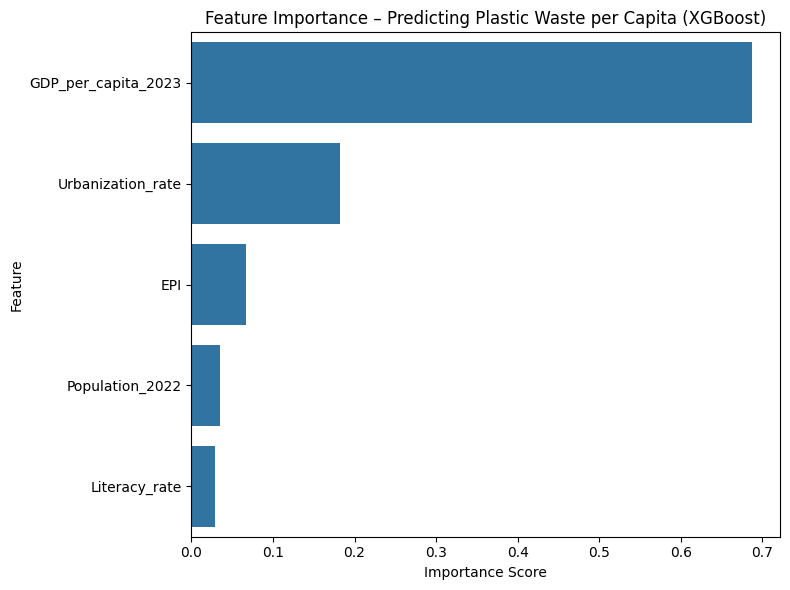

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = xgb_model.feature_importances_
feature_names = X.columns

# Create DataFrame for easier plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title("Feature Importance – Predicting Plastic Waste per Capita (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

From the XGBoost feature importance chart, we can infer the following conclusions regarding the predictors of plastic waste per capita in low and lower-middle income countries:

* GDP per Capita (2023) is by far the most important predictor of plastic waste per capita among low and lower-middle-income countries — contributing nearly 70% of the model’s predictive power.

    This suggests that even within poorer nations, economic capacity is a key driver of plastic consumption and waste generation.

    This might reflect increased access to packaged goods, imported products, or lack of recycling systems accompanying economic development.

* Urbanization Rate is the second most influential factor.

    Urbanized areas typically have higher population densities, more consumption, and thus more plastic waste per capita.
    
    However, in lower-income countries, urban growth may outpace infrastructure development, exacerbating waste problems.

* EPI (Environmental Performance Index), Population (2022), and Literacy Rate show much lower importance.